In [1]:
#IMPORTING MODULES FOR PREPROCESSING
import pandas as pd
import numpy as np
import calendar as cal
import sklearn 
import matplotlib.pyplot as plt

In [2]:
#READING IN CSV FILE RAW FROM UCI REPO
DF_IN = pd.read_csv('online_shoppers_intentionRAW.csv')

In [3]:
#QUICK INVESTIGATION OF COLUMNS 
DF_IN.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


We have some non-numeric columns:

Month       ----------> Object 'string'


VisitorType ----------> Object


Weekend     ----------> Bool


Revenue     ----------> Bool


In [4]:
#EXPLORING DATA TYPES
DF_IN.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
#LOOKING INTO THE MONTHS COLUMN, NON NUMERIC, ABEREVIATED SHORT FORM MONTHS 
DF_IN['Month'].describe()

count     12330
unique       10
top         May
freq       3364
Name: Month, dtype: object

In [6]:
#FUNCTION TO CHANGE MONTH INTO NUMERIC VALUE
def abbr2num(Month):
    abbr2num = {name: num for num, name in enumerate(cal.month_abbr) if num}
    
    return abbr2num[Month]

In [7]:
#Setting June to be Jun so matches the dictionary above
DF_IN['Month'][DF_IN['Month'] == 'June'] = 'Jun'

<ipython-input-7-32ae2d167c33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_IN['Month'][DF_IN['Month'] == 'June'] = 'Jun'


In [8]:
DF_IN['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'Jun', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [9]:
#USING APPLY FUNCTION TO TRANSLATE MONTH 2 NUMERIC VALUE
DF_IN['Month_Numeric'] = DF_IN['Month'].apply(abbr2num)

In [10]:
#NOW DEALING WITH VISITOR TYPE
DF_IN['VisitorType'].unique()
DF_IN['VT_Numeric'] = 0

In [11]:

for i,j in enumerate(DF_IN['VisitorType'].unique()):
    DF_IN.loc[DF_IN['VisitorType']==j,'VT_Numeric'] = i+1

In [12]:
DF_IN['VT_Numeric']

0        1
1        1
2        1
3        1
4        1
        ..
12325    1
12326    1
12327    1
12328    1
12329    2
Name: VT_Numeric, Length: 12330, dtype: int64

In [13]:
DF_IN['VT_Numeric'].unique()

array([1, 2, 3], dtype=int64)

In [14]:
#MATLAB didnt like the boolens from csv file so function to make boolean into binary
def BOOL2BIN(DF,X):
    DF.loc[DF_IN[X] ==True, X] = 1
    DF.loc[DF_IN[X] ==False, X] = 0
    return DF

print('done')

done


In [15]:
DF_IN = BOOL2BIN(DF_IN,'Revenue')

In [16]:
DF_IN['Revenue'].unique()

array([0, 1], dtype=object)

In [17]:
DF_IN = BOOL2BIN(DF_IN,'Weekend')

In [71]:
DF_IN.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_Numeric,VT_Numeric
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,7.651987,1.151176
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,3.392841,0.376989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,5.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,7.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,11.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,12.000000,3.000000


In [18]:
DF_IN = DF_IN.drop('VisitorType',1)
DF_IN = DF_IN.drop('Month',1)
DF_IN.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Weekend                     object
Revenue                     object
Month_Numeric                int64
VT_Numeric                   int64
dtype: object

In [19]:


for (columnName, columnData) in DF_IN.iteritems():
     DF_IN[columnName] = pd.to_numeric(DF_IN[columnName])
   

In [20]:
DF_IN.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Weekend                      int64
Revenue                      int64
Month_Numeric                int64
VT_Numeric                   int64
dtype: object

In [21]:
DF_IN.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Numeric,VT_Numeric
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745,7.651987,1.151176
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676,3.392841,0.376989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,5.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,7.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,11.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,12.000000,3.000000


In [22]:
Y_OUT = DF_IN['Revenue']

In [23]:
DF_IN = DF_IN.drop(['Revenue','Month_Numeric'],axis=1)

In [24]:
DF_IN.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VT_Numeric
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,1.151176
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.376989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,3.000000


In [25]:
DF_IN

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VT_Numeric
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,1,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,1,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,0,1


In [26]:
X = pd.get_dummies(DF_IN)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [27]:
Y = Y_OUT.to_numpy()

In [82]:
np.savetxt('DataX.csv', X, delimiter=',')

In [83]:
np.savetxt('DataY.csv', Y, delimiter=',')

In [28]:
DF_IN.corrwith(Y_OUT,axis=0).abs().sort_values(ascending=False)

PageValues                 0.492569
ExitRates                  0.207071
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates                0.150673
Administrative             0.138917
VT_Numeric                 0.098485
Informational              0.095200
Administrative_Duration    0.093587
SpecialDay                 0.082305
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
OperatingSystems           0.014668
Region                     0.011595
TrafficType                0.005113
dtype: float64

In [29]:
DF_SCALED = pd.DataFrame(X,columns=DF_IN.columns)

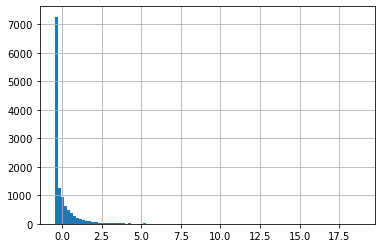

In [30]:
DF_SCALED['Administrative_Duration'].hist(bins=100)

In [87]:
DF_SCALED.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VT_Numeric
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-1.375191e-15,2.074316e-15,6.987391e-15,1.765777e-16,-2.849753e-16,1.021684e-15,1.333384e-15,-2.622846e-16,-4.953810e-15,-1.722823e-14,2.024424e-16,-2.961896e-15,-8.871609e-16,2.732067e-15,-5.903901e-16,1.247091e-14
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-3.088214e-01,-1.233426e+00,-7.902929e-01,-8.941785e-01,-7.626290e-01,-5.505517e-01,-4.010251e-01
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,-3.171778e-01,-3.088214e-01,-1.360783e-01,-2.079519e-01,-8.941785e-01,-5.141822e-01,-5.505517e-01,-4.010251e-01
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,-3.171778e-01,-3.088214e-01,-1.360783e-01,-2.079519e-01,-6.136354e-02,-5.141822e-01,-5.505517e-01,-4.010251e-01
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,-3.171778e-01,-3.088214e-01,9.612698e-01,-2.079519e-01,3.550439e-01,-1.728851e-02,-5.505517e-01,-4.010251e-01
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,1.916634e+01,4.718598e+00,6.448010e+00,6.197799e+00,2.437081e+00,3.957861e+00,1.816360e+00,4.904382e+00


In [31]:
import seaborn as sns

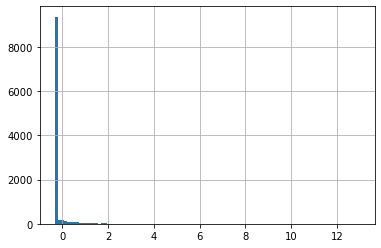

In [111]:
DF_SCALED['PageValues'][Y_OUT==0].hist(bins=100)

C:\Users\austi\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\austi\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function

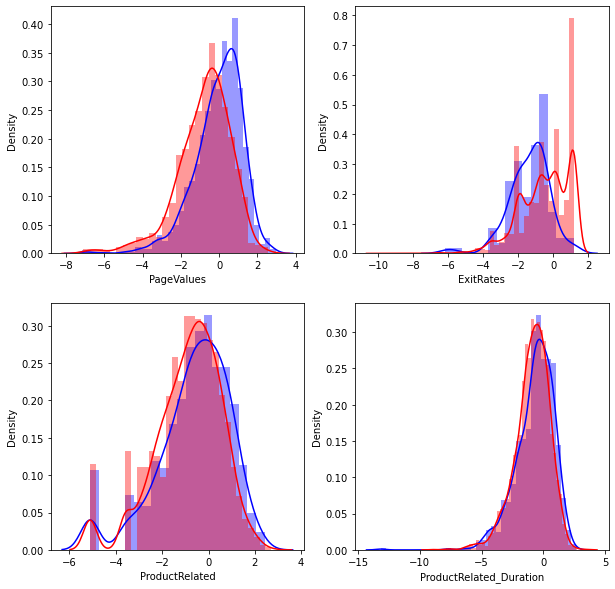

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
sns.distplot(np.log(DF_SCALED['PageValues'][Y_OUT==1]),label="Positive", color="blue",ax=axes[0, 0])
sns.distplot(np.log(DF_SCALED['PageValues'][Y_OUT==0]),label="Negative",color="red", ax=axes[0, 0])
sns.distplot(np.log(DF_SCALED['ExitRates'][Y_OUT==1]), color="blue", ax=axes[0, 1])
sns.distplot(np.log(DF_SCALED['ExitRates'][Y_OUT==0]), color="red", ax=axes[0, 1])
sns.distplot(np.log(DF_SCALED['ProductRelated'][Y_OUT==1] ), color="blue", ax=axes[1, 0])
sns.distplot(np.log(DF_SCALED['ProductRelated'][Y_OUT==0]) , color="red", ax=axes[1, 0])
sns.distplot(np.log(DF_SCALED['ProductRelated_Duration'] [Y_OUT==1]), color="blue", ax=axes[1, 1])
sns.distplot(np.log(DF_SCALED['ProductRelated_Duration'] [Y_OUT==0]), color="red", ax=axes[1, 1])

#plt.savefig('Top5_Histos', dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=None,
#        frameon=None, metadata=None)
